# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [75]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()
study_results.head()

# Combine the data into a single DataFrame
merged = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [76]:
# Checking the number of mice.
mouse_count = merged["Mouse ID"].value_counts()
mice = len(mouse_count)
mice

249

In [77]:
# Find Duplicate Mouse Values
dup_mice = merged.loc[merged.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
dup_mice

array(['g989'], dtype=object)

In [78]:
# Duplicate id is "g989"

# Our data should be uniquely identified by Mouse ID and Timepoint
dup_mice_df = merged.loc[merged["Mouse ID"] == "g989", :]
dup_mice_df
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [79]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged[merged["Mouse ID"] !="g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [80]:
# Checking the number of mice in the clean DataFrame.
new_count = len(clean_df["Mouse ID"].unique())
new_count


248

## Summary Statistics

In [81]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_df = clean_df.groupby("Drug Regimen")
drug_df
mean_tumor = pd.DataFrame(drug_df["Tumor Volume (mm3)"].mean())
mean_tumor
median_tumor = pd.DataFrame(drug_df["Tumor Volume (mm3)"].median())
variance_tumor = pd.DataFrame(drug_df["Tumor Volume (mm3)"].var())
standard_deviation_tumor = pd.DataFrame(drug_df["Tumor Volume (mm3)"].std())
sem_tumor = pd.DataFrame(drug_df["Tumor Volume (mm3)"].sem())

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
new_df = pd.merge(mean_tumor,median_tumor, on="Drug Regimen")
new_df
new_df_2 = pd.merge(new_df,variance_tumor, on="Drug Regimen")
new_df_2
new_df_3 = pd.merge(new_df_2,standard_deviation_tumor, on="Drug Regimen")
new_df_3
new_df_4 = pd.merge(new_df_3,sem_tumor, on="Drug Regimen")
new_df_4
tumor_volume = new_df_4
tumor_volume.columns = ["Tumor Volume Mean","Tumor Volume Median","Tumor Volume Variance", "Tumor Volume STD", "Tumor Volume SEM" ]
tumor_volume

/var/folders/x4/l7tc61hd00n1s8vbqfwjq7k40000gn/T/ipykernel_5763/1111125917.py:17: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Tumor Volume (mm3)_x'} in the result is deprecated and will raise a MergeError in a future version.
  new_df_3 = pd.merge(new_df_2,standard_deviation_tumor, on="Drug Regimen")


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume STD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [82]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
clean_df
# Using the aggregation method, produce the same summary statistics in a single line
tumor_aggregate = {"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]}
clean_df.groupby("Drug Regimen").agg(tumor_aggregate)


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

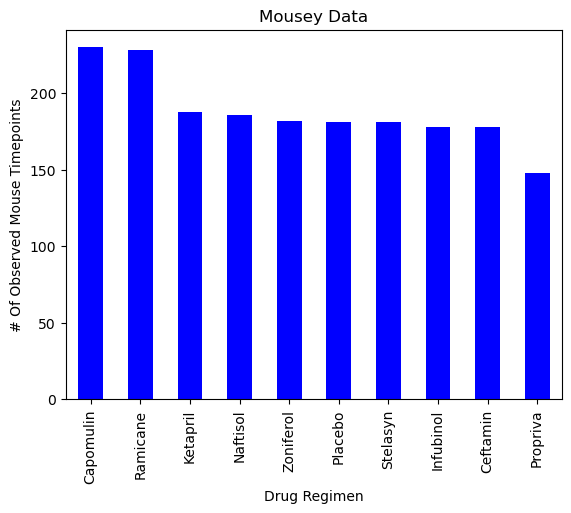

In [83]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
tumor_pandas = clean_df["Drug Regimen"].value_counts()
tumor_pandas
tumor_bar = tumor_pandas.plot.bar(color="b", title="Mousey Data")
plt.xlabel("Drug Regimen")
plt.ylabel("# Of Observed Mouse Timepoints")
plt.show()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


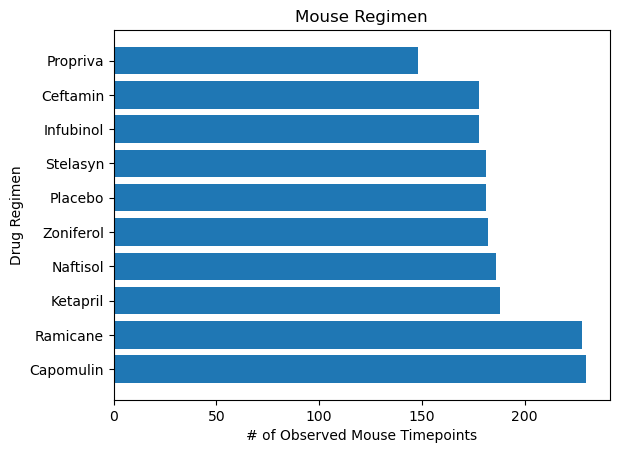

In [84]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
counts = clean_df["Drug Regimen"].value_counts()
counts
# mouse_plot = mouse_id.plot.bar(color='b')
plt.barh(counts.index, counts.values)
plt.title("Mouse Regimen")
plt.xlabel("# of Observed Mouse Timepoints")
plt.ylabel("Drug Regimen")

plt.show()

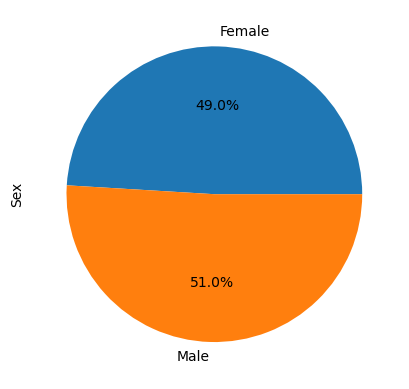

In [85]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_dist = clean_df.groupby("Sex")
gender_total = gender_dist["Sex"].count()
gender_total
gender_pie = gender_total.plot(kind = "pie", y = "Sex", autopct = "%1.1f%%" )

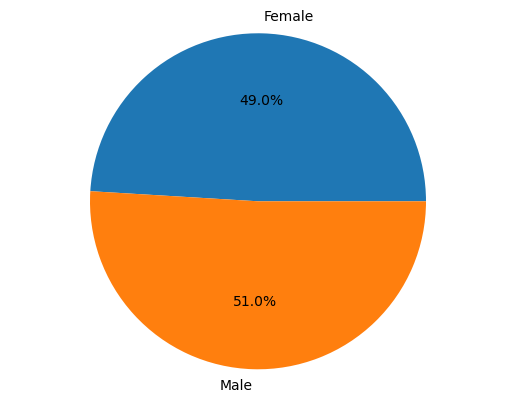

In [86]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
count = [gender_total["Female"],gender_total["Male"]]
plt.pie(count, labels = labels, autopct="%1.1f%%")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [87]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin]
# Start by getting the last (greatest) timepoint for each mouse
capomulin_vol = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]
capomulin_final = capomulin_vol.groupby("Mouse ID")["Timepoint"].max()
capomulin_final = pd.DataFrame(capomulin_final)
capomulin_final = pd.merge(capomulin_final, clean_df, on=("Mouse ID", "Timepoint"), how="left")
capomulin_final.head()

capomulin_sum = capomulin_final["Tumor Volume (mm3)"]
quartiles = capomulin_sum.quantile([.25, .5, .75])
lowerquart = quartiles[.25]
upperquart = quartiles[.75]
iqr = upperquart - lowerquart
lower_bound = lowerquart - (1.5*iqr)
upper_bound = upperquart + (1.5*iqr)



print(f"The lower quartile of Capomulin is : {lowerquart}")
print(f"The upper quartile of Capomulin is : {upperquart}")
print(f"The interquartile of Capomulin is : {iqr}")
print(f"The median of Capomulin is : {quartiles[0.5]}")
print(f"Values less than {lower_bound} could be outliers")
print(f"Values greater than {upper_bound} could be outliers")

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


The lower quartile of Capomulin is : 32.37735684
The upper quartile of Capomulin is : 40.1592203
The interquartile of Capomulin is : 7.781863460000004
The median of Capomulin is : 38.1251644
Values less than 20.70456164999999 could be outliers
Values greater than 51.83201549 could be outliers


In [88]:
ramicane_vol = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
ramicane_final = ramicane_vol.groupby("Mouse ID")["Timepoint"].max()
ramicane_final = pd.DataFrame(ramicane_final)
ramicane_final = pd.merge(ramicane_final, clean_df, on=("Mouse ID", "Timepoint"), how="left")
ramicane_final.head()

ramicane_sum = ramicane_final["Tumor Volume (mm3)"]
quartiles = ramicane_sum.quantile([.25, .5, .75])
lowerquart = quartiles[.25]
upperquart = quartiles[.75]
iqr = upperquart - lowerquart
lower_bound = lowerquart - (1.5*iqr)
upper_bound = upperquart + (1.5*iqr)


print(f"The lower quartile of Ramicane is : {lowerquart}")
print(f"The upper quartile of Ramicane is : {upperquart}")
print(f"The interquartile of Ramicane is : {iqr}")
print(f"The median of Ramicane is : {quartiles[0.5]}")
print(f"Values less than {lower_bound} could be outliers")
print(f"Values greater than {upper_bound} could be outliers")


The lower quartile of Ramicane is : 31.56046955
The upper quartile of Ramicane is : 40.65900627
The interquartile of Ramicane is : 9.098536719999998
The median of Ramicane is : 36.56165229
Values less than 17.912664470000003 could be outliers
Values greater than 54.30681135 could be outliers


In [89]:
infubinol_vol = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
infubinol_final = infubinol_vol.groupby("Mouse ID")["Timepoint"].max()
infubinol_final = pd.DataFrame(infubinol_final)
infubinol_final = pd.merge(infubinol_final, clean_df, on=("Mouse ID", "Timepoint"), how="left")
infubinol_final.head()

infubinol_sum = infubinol_final["Tumor Volume (mm3)"]
quartiles = infubinol_sum.quantile([.25, .5, .75])
lowerquart = quartiles[.25]
upperquart = quartiles[.75]
iqr = upperquart - lowerquart
lower_bound = lowerquart - (1.5*iqr)
upper_bound = upperquart + (1.5*iqr)


print(f"The lower quartile of Infubinol is : {lowerquart}")
print(f"The upper quartile of Infubinol is : {upperquart}")
print(f"The interquartile of Infubinol is : {iqr}")
print(f"The median of Infubinol is : {quartiles[0.5]}")
print(f"Values less than {lower_bound} could be outliers")
print(f"Values greater than {upper_bound} could be outliers")


The lower quartile of Infubinol is : 54.04860769
The upper quartile of Infubinol is : 65.52574285
The interquartile of Infubinol is : 11.477135160000003
The median of Infubinol is : 60.16518046
Values less than 36.83290494999999 could be outliers
Values greater than 82.74144559000001 could be outliers


In [90]:

ceftamin_vol = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]
ceftamin_final = ceftamin_vol.groupby("Mouse ID")["Timepoint"].max()
ceftamin_final = pd.DataFrame(ceftamin_final)
ceftamin_final = pd.merge(ceftamin_final, clean_df, on=("Mouse ID", "Timepoint"), how="left")
ceftamin_final.head()

ceftamin_sum = ceftamin_final["Tumor Volume (mm3)"]
quartiles = ceftamin_sum.quantile([.25, .5, .75])
lowerquart = quartiles[.25]
upperquart = quartiles[.75]
iqr = upperquart - lowerquart
lower_bound = lowerquart - (1.5*iqr)
upper_bound = upperquart + (1.5*iqr)


print(f"The lower quartile of Ceftamin is : {lowerquart}")
print(f"The upper quartile of Ceftamin is : {upperquart}")
print(f"The interquartile of Ceftamin is : {iqr}")
print(f"The median of Ceftamin is : {quartiles[0.5]}")
print(f"Values less than {lower_bound} could be outliers")
print(f"Values greater than {upper_bound} could be outliers")

The lower quartile of Ceftamin is : 48.72207785
The upper quartile of Ceftamin is : 64.29983003
The interquartile of Ceftamin is : 15.577752179999997
The median of Ceftamin is : 59.85195552
Values less than 25.355449580000002 could be outliers
Values greater than 87.66645829999999 could be outliers


In [91]:
ceftamin_final

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2
5,h531,5,Ceftamin,Male,5,27,47.784682,0
6,j296,45,Ceftamin,Female,24,30,61.849023,3
7,k210,45,Ceftamin,Male,15,28,68.923185,3
8,l471,45,Ceftamin,Female,7,28,67.748662,1
9,l490,30,Ceftamin,Male,24,26,57.918381,3


In [92]:
max_tumor = clean_df.groupby(["Mouse ID"]).agg({"Timepoint": "max"})
max_tumor
tumor_plot = pd.merge(clean_df, max_tumor, on=["Mouse ID", "Timepoint"], how="right")
tumor_plot

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [93]:


# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in treatments:

        
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # tumor_final = clean_df.loc[clean_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_final = tumor_plot.loc[tumor_plot["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_final)
    
    # Determine outliers using upper and lower bounds
    quartiles = tv.quantile([.25, .5, .75])

In [94]:
quartiles

0.25    47.208427
0.50    51.776157
0.75    56.801438
Name: Tumor Volume (mm3), dtype: float64

In [95]:
#iqr
iqr = quartiles[.75] - quartiles[.25]
lowerb = quartiles[0.25] - (1.5*iqr)
upperb = quartiles[0.75] + (1.5*iqr)
outliers = tumor_final.loc[(tumor_final < lowerb) | tumor_final > upperb]


In [96]:
outliers = tumor_final.loc[(tumor_final < lowerb) | tumor_final > upperb]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [ ]:
# Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
# Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
# Infubinol's potential outliers: 31    36.321346
# Name: Tumor Volume (mm3), dtype: float64
# Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

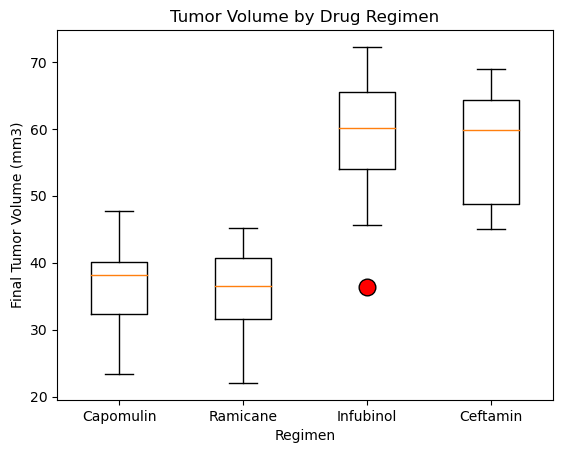

In [59]:
# plt.boxplot(tumor_vol_data, labels=treatments, flierprops={"markerfacecolor":"red", "markersize":12})
# plt.xlabel("Regimen")
# plt.ylabel("Final Tumor Volume (mm3)")
# plt.title("Tumor Volume by Drug Regimen")
# plt.show()

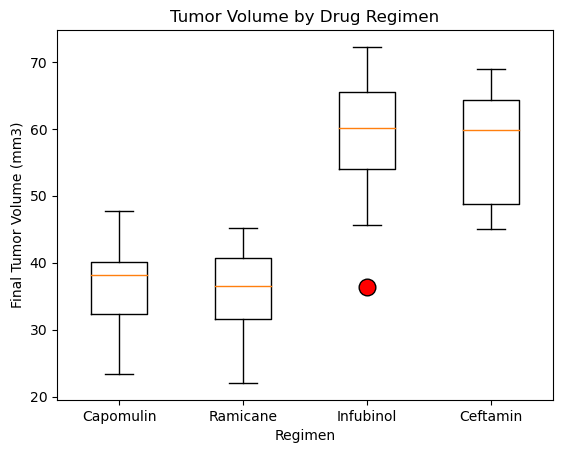

In [97]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments, flierprops={"markerfacecolor":"red", "markersize":12})
plt.xlabel("Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Tumor Volume by Drug Regimen")
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

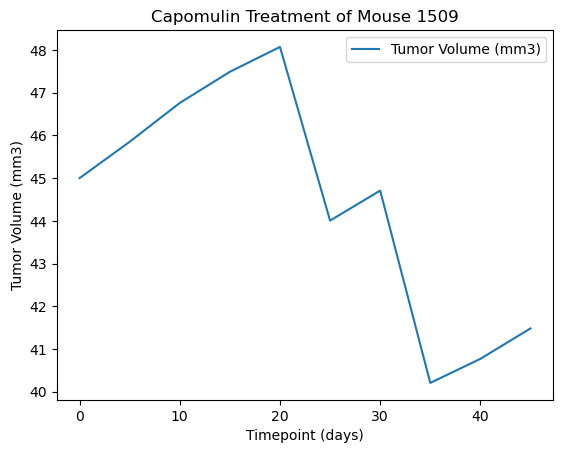

In [98]:
cap = clean_df[clean_df["Drug Regimen"]=="Capomulin"]
cap[cap["Mouse ID"] == "l509"].plot(x = "Timepoint", y="Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse 1509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

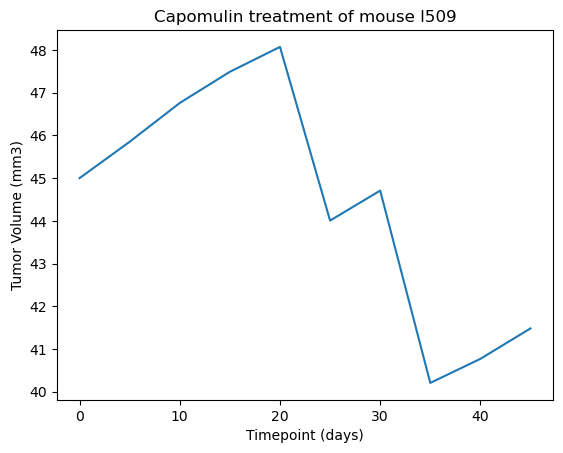

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


<Axes: xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

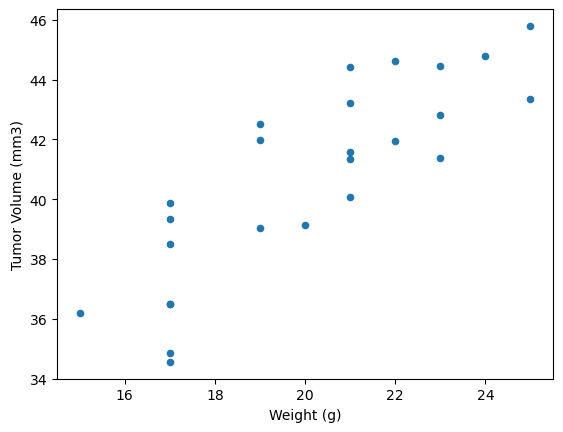

In [99]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap.groupby(["Mouse ID"]).agg({"Weight (g)" : "mean", "Tumor Volume (mm3)" : "mean"}).plot.scatter(x = "Weight (g)", y = "Tumor Volume (mm3)")

In [100]:
data = cap.groupby(["Mouse ID"]).agg({"Weight (g)" : "mean", "Tumor Volume (mm3)" : "mean"})
data
data.corr()
# y = mx + b



,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.841936
Tumor Volume (mm3),0.841936,1.000000


In [101]:
st.pearsonr(data["Weight (g)"], data["Tumor Volume (mm3)"])
st.linregress(data["Weight (g)"], data["Tumor Volume (mm3)"])
model = st.linregress(data["Weight (g)"], data["Tumor Volume (mm3)"])
m = model.slope
b = model.intercept

Text(22, 36, 'y = 0.95 x + 21.55')

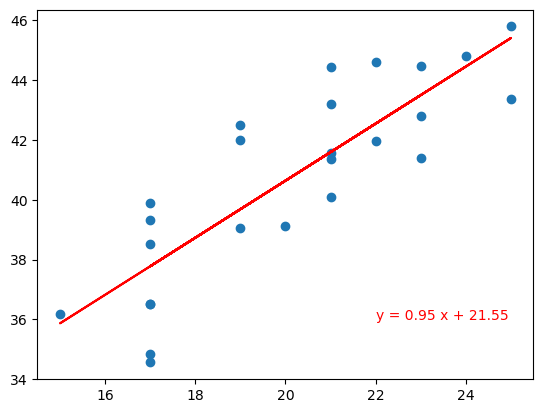

In [102]:
y = m * data["Weight (g)"] + b
plt.scatter(data["Weight (g)"], data["Tumor Volume (mm3)"])
plt.plot(data["Weight (g)"], y, color="red")
plt.annotate(f"y = {round(m,2)} x + {round(b,2)}", (22, 36), color="red")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


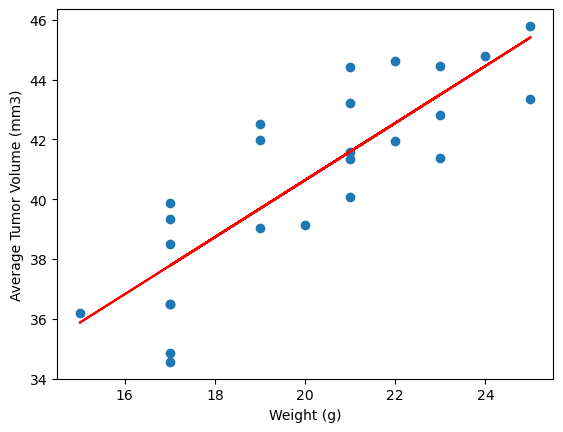

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
